Индивидуальный проект: **Предсказание цены на авто по её характеристике и месту продажи**
  
Автор: **Мажурин Андрей Дмитриевич**
  
Проверяющий:
  
Ссылка на датасет: https://www.kaggle.com/datasets/ekibee/car-sales-information

## План
1. Цель и задачи исследования
2. Описание набора данных 
3. Разведочный анализ и корректировка данных
4. Выбор алгоритма и создание наборов для обучения и тестирования
5. Предсказание и результаты
6. Оценка качества
7. Вывод

### 1. Цель и задачи исследования


Цель: на основе имеющихся данных о характеристиках продаваемых авто предсказать их стоимость.

Задачи:  
- Обозначить какие данные имеются в распоряжении.
- Установить как эти данные могут быть использованы
- Применить методы изучения объемов данных для своего исследования
- Привести результаты исследования

### 2. Описание набора данных

- Выборка включает 1513200 записей и 17 признаков (строки и столбцы соответственно).

- Целевая переменная "price" — цена, установленная продавцов на данный автомобиль.

- Количественные переменные:
                                        
  - **year** — год выпуска авто;
  - **mileage** — пробег (в км);
  - **power** — мощность двигателя (в л.с.);
  - **price** — цена автомобиля (в рублях);    
                                                             
- Категориальный переменные:
                                          
  - **brand** — название бренда автомобиля;
  - **name** — название модели автомобиля;
  - **bodyType** — тип кузова;
  - **color** — цвет авто;
  - **fuelType** - тип топлива;
  - **transmission** - тип трансмиссии;
  - **vehicleConfiguration** - компановка машины;
  - **engineName** - название двигателя;
  - **engineDisplacement** - объем двигателя;
  - **date** - дата появления объявления о продаже;
  - **location** - место продажи;
  - **link** - ссылка на объявление;
  - **parse_date** - дата парсинга;

### 3. Разведочный анализ и корректировка данных

Загрузим необходимые библеотеки и методы.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from pylab import rcParams
from statistics import median
from matplotlib import pyplot as PLT
import pandas as pd
import datetime
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

Считаем датасет и посмотрим на его начало.

In [2]:
df = pd.read_csv('E:/123/region25_en.csv')

In [3]:
df.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


Сразу видно "NaN" - это пропуск. Т.к. в датасете оочень много записей (1.5м), то я решил удалить записи с пропусками.

In [4]:
df = df.dropna()
print(df.shape)

(1002096, 17)


Посмотрим на характеристики стобцов, чтобы, возможно, понять, какие нам не нужны.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002096 entries, 2 to 1513199
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1002096 non-null  object 
 1   name                  1002096 non-null  object 
 2   bodyType              1002096 non-null  object 
 3   color                 1002096 non-null  object 
 4   fuelType              1002096 non-null  object 
 5   year                  1002096 non-null  float64
 6   mileage               1002096 non-null  float64
 7   transmission          1002096 non-null  object 
 8   power                 1002096 non-null  float64
 9   price                 1002096 non-null  int64  
 10  vehicleConfiguration  1002096 non-null  object 
 11  engineName            1002096 non-null  object 
 12  engineDisplacement    1002096 non-null  object 
 13  date                  1002096 non-null  object 
 14  location              1002096 non-

Очень много объектов, это плохо, но исправимо очень легко (далее). Пока что я выведу ещё 1 таблицу, которая поможет мне кое-что объяснить.

In [6]:
df.describe(include=['object'])

,brand,name,bodyType,color,fuelType,transmission,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
count,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096,1002096
unique,61,840,11,15,2,4,7595,1117,55,39,69,31437,773
top,Toyota,Land Cruiser Prado,jeep 5 doors,white,Gasoline,CVT,1.8 S,2ZR-FXE,1.5 LTR,2022-09-10 00:00:00,Vladivostok,https://vladivostok.drom.ru/toyota/harrier/473...,2022-09-13 12:00:00
freq,479512,51623,350766,325555,919005,476604,13553,60172,193333,34640,598653,758,2666


Обратим внимание на строку "unique" - кол-во уникальных значений. Судя по ней, нам очень не хотелось бы иметь дело с признаком 'link' (оно и логично - она отвечает за ссылку на объявление о продаже, оно нам не надо). 'parse_date' - тоже смысла не несёт. 

In [7]:
df = df.drop(['link', 'parse_date'], axis='columns')

Поменяем float на int.

In [8]:
df['power'] = df.power.astype('int64')
df['mileage'] = df.mileage.astype('int64')
df['year'] = df.year.astype('int64')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002096 entries, 2 to 1513199
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   brand                 1002096 non-null  object
 1   name                  1002096 non-null  object
 2   bodyType              1002096 non-null  object
 3   color                 1002096 non-null  object
 4   fuelType              1002096 non-null  object
 5   year                  1002096 non-null  int64 
 6   mileage               1002096 non-null  int64 
 7   transmission          1002096 non-null  object
 8   power                 1002096 non-null  int64 
 9   price                 1002096 non-null  int64 
 10  vehicleConfiguration  1002096 non-null  object
 11  engineName            1002096 non-null  object
 12  engineDisplacement    1002096 non-null  object
 13  date                  1002096 non-null  object
 14  location              1002096 non-null  object
dty

Путём проб и ошибок я понял, что на данном этапе признак location необходимо заменить следующим образом - т.к. стоимость авто не зависит от названия города, нам необходимо заменить их на значения населения (что довольно проблематично) либо на цифры (числа) соответствующие их масштабу (малый, средний, большой город). Для этого я выделю самые часто встречающиеся города и заменю их название в датасете.

In [10]:
df['location'].value_counts()

Vladivostok         598653
Ussurijsk           177771
Nahodka              70397
Artem                45990
Arsenev              13831
                     ...  
Novonikolsk             19
Chkalovskoe             18
Primorskij              17
Krasnorechenskij        14
Vysokogorsk             10
Name: location, Length: 69, dtype: int64

In [11]:
freq_location = df.location.value_counts(normalize=True)
most_freq_location = freq_location[freq_location>0.005].index
print(f'Размер датасета:{df.shape}')
df = df[df['location'].isin(most_freq_location)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(1002096, 15)
Размер датасета:(961757, 15)


In [12]:
df['location'].value_counts()

Vladivostok      598653
Ussurijsk        177771
Nahodka           70397
Artem             45990
Arsenev           13831
Spassk-Dalnij     12979
Dalnegorsk        10625
Bolshoj Kamen      9293
Dalnerechensk      7726
Partizansk         7364
Lesozavodsk        7128
Name: location, dtype: int64

Получилось так: 0 - Большой город (Только Владивосток - 600к), 1 - средний город (следующие 3 - более 100к), остальные меньше 100к жителей - 2, малый город.

In [13]:
df.loc[df["location"] == "Vladivostok", "location"] = 0
for i in range(1,4,1):
    df.loc[df["location"] == most_freq_location[i], "location"] = 1
for i in range(4,11,1):
    df.loc[df["location"] == most_freq_location[i], "location"] = 2

In [14]:
df['location'].value_counts()

0    598653
1    294158
2     68946
Name: location, dtype: int64

Замечательно!

Чтобы проанализировать одно из самых важных - корреляцию необходимо избавиться от типа object. Пока что этого не делаю, т.к. для более наглядного анализа распределений словестные обозначения подходят. Посмотрим на целевой признак.

<AxesSubplot:>

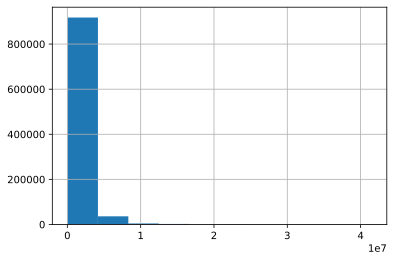

In [15]:
df.price.hist()

Ужасная картина. Поэтому чтобы избежать подобного далее я отсею те наименования где процент вхождений в выборку менее 0.1 процента.

In [16]:
freq_price = df.price.value_counts(normalize=True)
most_freq_price = freq_price[freq_price>0.001].index
print(f'Размер датасета:{df.shape}')
df = df[df['price'].isin(most_freq_price)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(961757, 15)
Размер датасета:(705508, 15)


<AxesSubplot:>

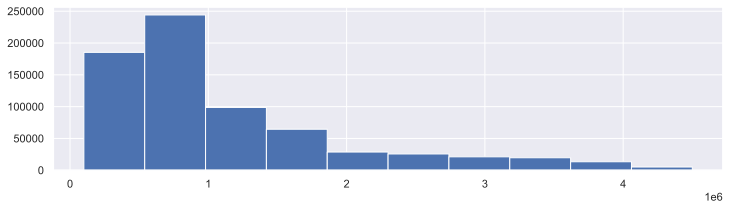

In [17]:
sns.set(rc = {'figure.figsize':(12,3)})
df = df[df['price'].isin(most_freq_price)]
df.price.hist()

Уже лучше, целевой признак поправили. Прям похоже на нормальное распределение. С остальными признаками предлагаю сделать аналогичную работу.

<AxesSubplot:>

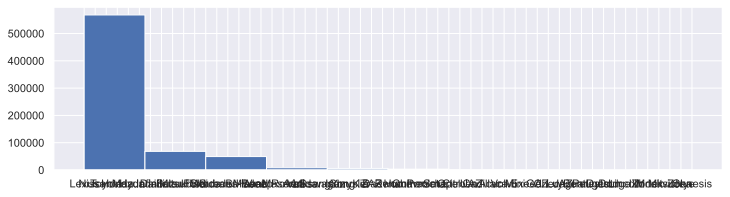

In [18]:
df.brand.hist()

In [19]:
freq_brand = df.brand.value_counts(normalize=True)
most_freq_brand = freq_brand[freq_brand>0.01].index
print(f'Размер датасета:{df.shape}')
df = df[df['brand'].isin(most_freq_brand)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(705508, 15)
Размер датасета:(667718, 15)


<AxesSubplot:>

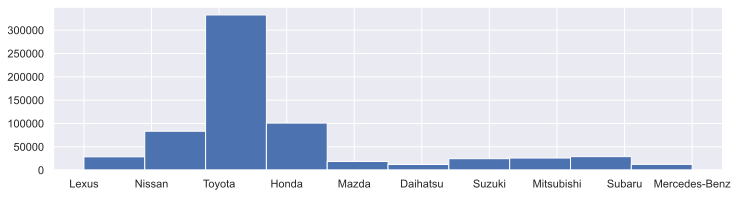

In [20]:
df.brand.hist()

Name

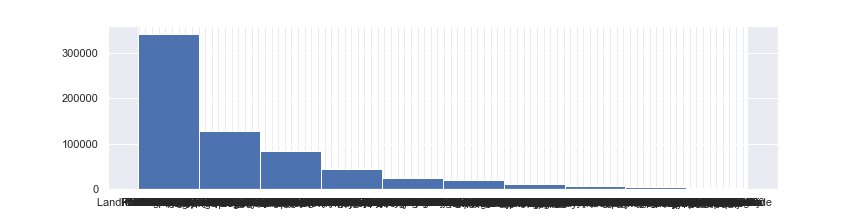

<AxesSubplot:>

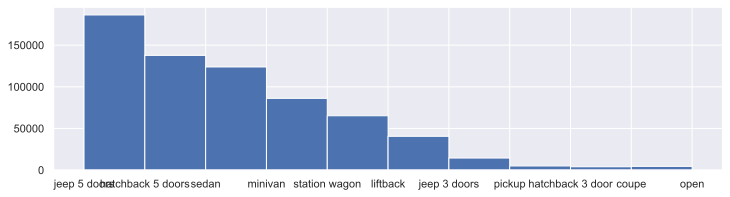

In [21]:
df.bodyType.hist()

<AxesSubplot:>

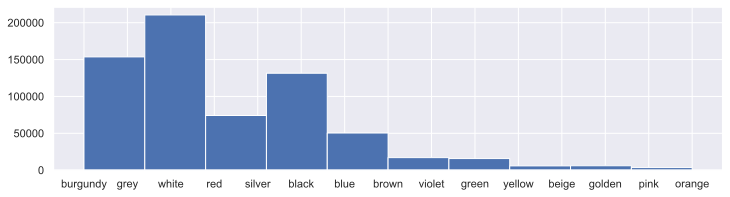

In [22]:
df.color.hist()

<AxesSubplot:>

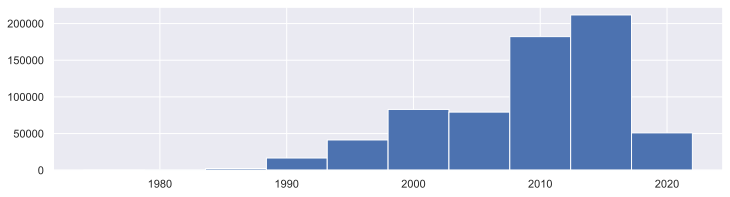

In [23]:
df.year.hist()

<AxesSubplot:>

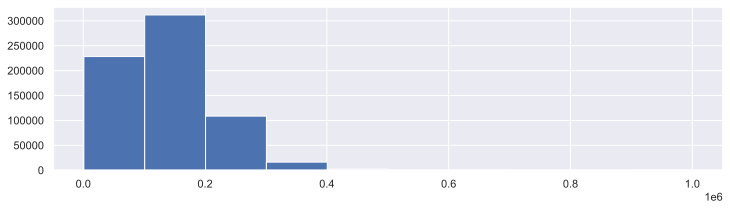

In [24]:
df.mileage.hist()

In [25]:
freq_mileage = df.mileage.value_counts(normalize=True)
most_freq_mileage = freq_mileage[freq_mileage>0.001].index
print(f'Размер датасета:{df.shape}')
df = df[df['mileage'].isin(most_freq_mileage)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(667718, 15)
Размер датасета:(632197, 15)


<AxesSubplot:>

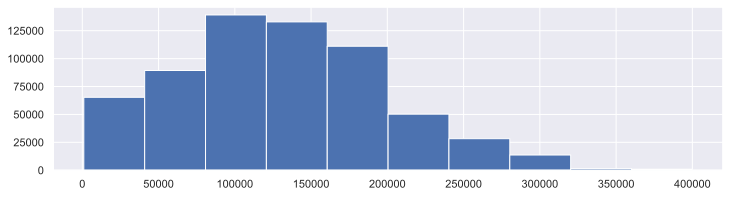

In [26]:
df.mileage.hist()

<AxesSubplot:>

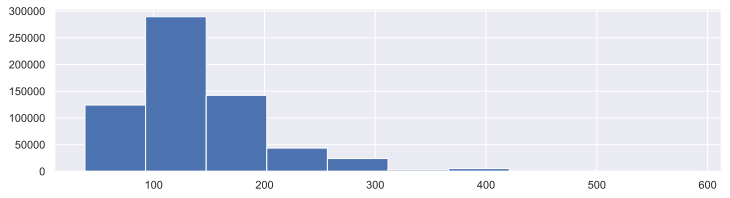

In [27]:
df.power.hist()

In [28]:
freq_power = df.power.value_counts(normalize=True)
most_freq_power = freq_power[freq_power>0.001].index
print(f'Размер датасета:{df.shape}')
df = df[df['power'].isin(most_freq_power)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(632197, 15)
Размер датасета:(611610, 15)


<AxesSubplot:>

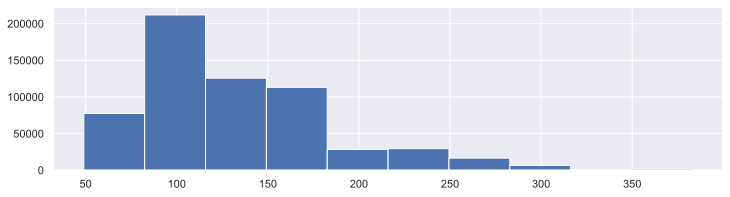

In [29]:
df.power.hist()

Гружу готовую, ибо лагает. vehicleConfiguration

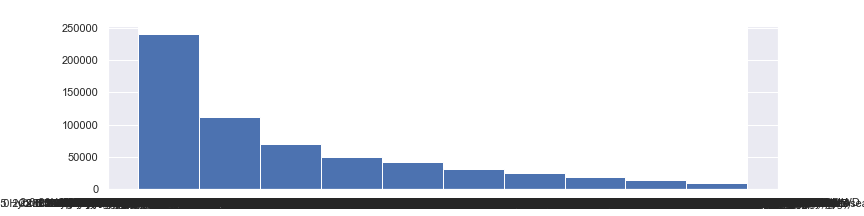

<AxesSubplot:>

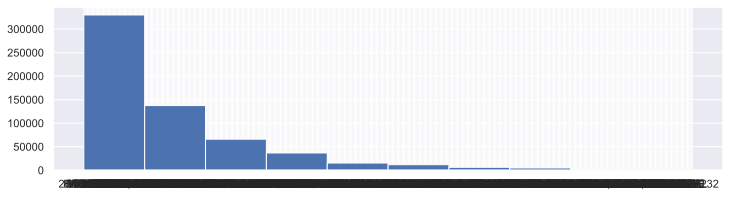

In [30]:
df.engineName.hist()

In [31]:
freq_engineName = df.engineName.value_counts(normalize=True)
most_freq_engineName = freq_engineName[freq_engineName>0.001].index
print(f'Размер датасета:{df.shape}')
df = df[df['engineName'].isin(most_freq_engineName)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(611610, 15)
Размер датасета:(561456, 15)


<AxesSubplot:>

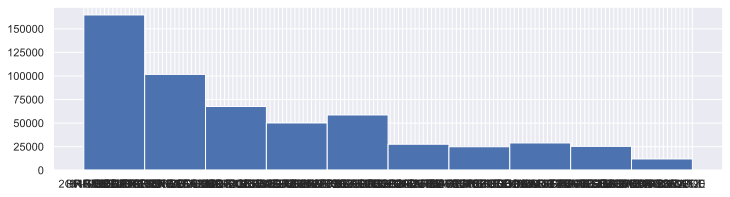

In [32]:
df.engineName.hist()

<AxesSubplot:>

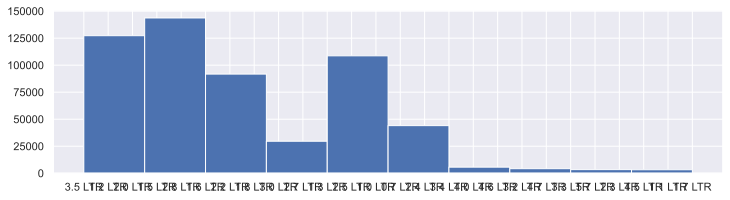

In [33]:
df.engineDisplacement.hist()

In [34]:
freq_engineDisplacement = df.engineDisplacement.value_counts(normalize=True)
most_freq_engineDisplacement = freq_engineDisplacement[freq_engineDisplacement>0.01].index
print(f'Размер датасета:{df.shape}')
df = df[df['engineDisplacement'].isin(most_freq_engineDisplacement)]
print(f'Размер датасета:{df.shape}')

Размер датасета:(561456, 15)
Размер датасета:(542702, 15)


<AxesSubplot:>

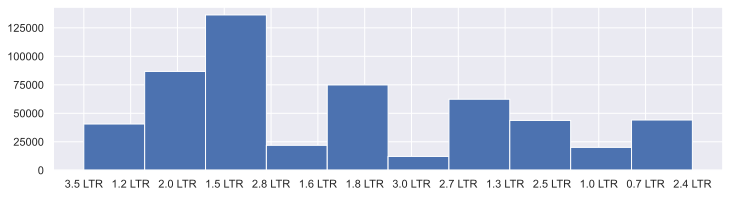

In [35]:
df.engineDisplacement.hist()

Не буду заморачиваться над этим параметром, по старой памяти при просмотре корреляций его уберём.

<AxesSubplot:>

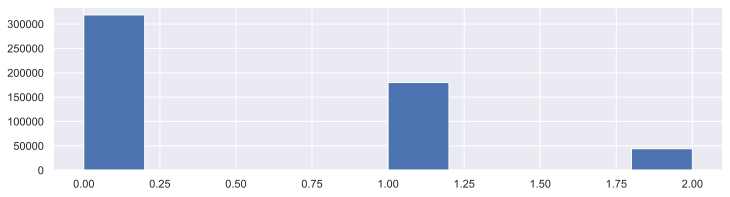

In [36]:
df.location.hist()

Наконец посмотрели распределения, поработали с выбросами. Я не решил какой boxplot может показаться полезным, поэтому пойду далее к корреляциям.

Теперь закодируем object'ы

In [37]:
enc = LabelEncoder()
df['brand'] = enc.fit_transform(df['brand'])
df['name'] = enc.fit_transform(df['name'])
df['bodyType'] = enc.fit_transform(df['bodyType'])
df['color'] = enc.fit_transform(df['color'])
df['fuelType'] = enc.fit_transform(df['fuelType'])
df['transmission'] = enc.fit_transform(df['transmission'])
df['vehicleConfiguration'] = enc.fit_transform(df['vehicleConfiguration'])
df['engineName'] = enc.fit_transform(df['engineName'])
df['engineDisplacement'] = enc.fit_transform(df['engineDisplacement'])

Выставлю удобный размер фигуры для матрицы корреляций.

<AxesSubplot:>

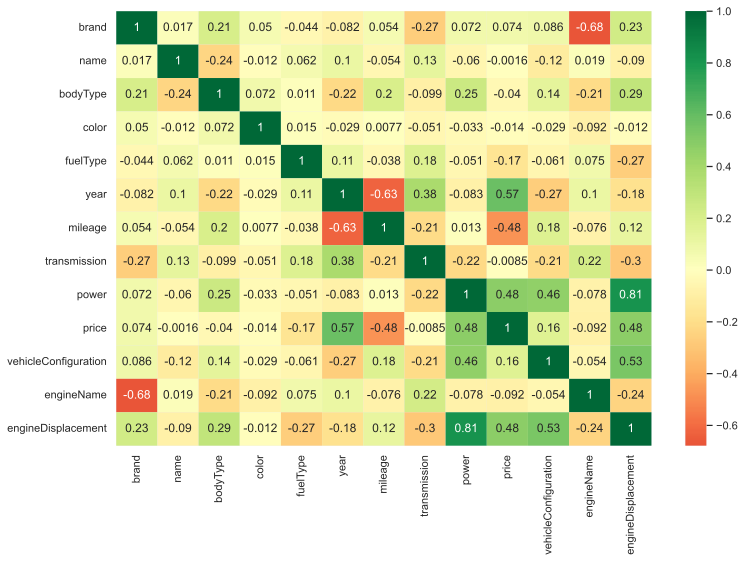

In [38]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df.corr(), xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)


Корреляция power и engineDisplacement не критичная, но значительная, на фоне того, что признаков много, уберу второй.

In [39]:
df = df.drop(['engineDisplacement'], axis='columns')

Данные более-менее готовы, можно идти далее.

Дата довольно важна, но её использовать как признак я не буду. В датасете всего 39 уникальных дат, т.е. чуть больше месяца, это не повлияет на цену, но поможет нам разбелить выборку по дате - в процессе подготовки это улучшило работу модели.

In [40]:
pd.to_datetime(df['date'])

5         2022-08-20
8         2022-08-20
10        2022-08-20
11        2022-08-20
17        2022-08-20
             ...    
1513187   2022-09-26
1513188   2022-09-26
1513189   2022-09-26
1513190   2022-09-26
1513192   2022-09-26
Name: date, Length: 542702, dtype: datetime64[ns]

In [41]:
df['location'] = df['location'].astype("int64")

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542702 entries, 5 to 1513192
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   brand                 542702 non-null  int32 
 1   name                  542702 non-null  int32 
 2   bodyType              542702 non-null  int32 
 3   color                 542702 non-null  int32 
 4   fuelType              542702 non-null  int32 
 5   year                  542702 non-null  int64 
 6   mileage               542702 non-null  int64 
 7   transmission          542702 non-null  int32 
 8   power                 542702 non-null  int64 
 9   price                 542702 non-null  int64 
 10  vehicleConfiguration  542702 non-null  int32 
 11  engineName            542702 non-null  int32 
 12  date                  542702 non-null  object
 13  location              542702 non-null  int64 
dtypes: int32(8), int64(5), object(1)
memory usage: 45.5+ MB
None


### 4. Выбор алгоритма и создание наборов для обучения и тестирования

Разделим выборку вручную по дате.

In [43]:
X_train = df[df['date'] <= '2022-08-26']
X_test = df[df['date'] > '2022-08-26']
X_train.drop('price', axis=1)
X_test.drop('price', axis=1)
y_train = X_train['price']
y_test = X_test['price']

X_train = X_train.drop(['date'], axis='columns')
X_test = X_test.drop(['date'], axis='columns')

Я выбрал алгоритм случайного леса, он показал себя очень хорошо и без настройки гиперпараметов.

In [44]:
rgr = RandomForestRegressor()

In [45]:
rgr.fit(X_train, y_train)

RandomForestRegressor()

### 5. Предсказание и результаты

In [46]:
y_pred = rgr.predict(X_test)

Результаты.

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
223200,690000,690000.0
223201,3550000,3550000.0
223203,1470000,1470000.0
223205,290000,290000.0
223206,2600000,2600000.0
...,...,...
1513187,775000,775000.0
1513188,950000,950000.0
1513189,700000,700000.0
1513190,800000,800000.0


### 6. Оценка качества

Для оценки качества я выбрал 2 метрики. При помощи RMSE я покажу погрешность в рублях, а при помощи R^2 мы узнаем насколько хорошо нашу выборку модель объясняет (доля).

In [48]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 516.2195249843434
R^2: 0.9999996186098624


### 7. Вывод


В процессе выполнения данной работы были изучены и использованы данные за август-сентябрь 2022 года о продаже автомобилей в Приморском крае. С помощью метода случайного леса получена модель, предсказывающая цену на авто в регионе в зависимости от характеристик автомобиля. Модель сходу без настройки гиперпараметров показала хороший результат, который не является переобучением ввиду неидеальной оценки качества её работы. Данная модель с небольшими доработками может быть использована чтобы предсказывать цену на автомобиль в регионах РФ в зависимости от характеристик авто. Данная модель поможет продавцам грамотно оценивать цену своего авто, чтобы успешно его продать.
